# **Data Collection**


In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [ ]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 33
Error on page 34
Error on page 34


In [ ]:
#check the length of total reviews extracted
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
len(date)

3500

In [ ]:
min_length = min(len(reviews), len(stars), len(date), len(country))

reviews = reviews[:min_length]
stars = stars[:min_length]
date = date[:min_length]
country = country[:min_length]


In [ ]:
#create  a dataframe from these collected lists of data
df = pd.DataFrame({"reviews": reviews, "stars": stars, "date": date, "country": country})

In [ ]:
df.head()

,reviews,stars,date,country
0,"Not Verified | On March 1st, I flew from Ber...",\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,9th July 2024,Germany
1,Not Verified | The WORST customer experience! ...,1,5th July 2024,United Kingdom
2,Not Verified | Had to cancel my flight month...,1,1st July 2024,Canada
3,✅ Trip Verified | Flight cancelled with no rea...,1,30th June 2024,United Kingdom
4,✅ Trip Verified | This is a route I fly regula...,1,26th June 2024,United Kingdom


In [30]:
df.to_csv("\content\sample_data")

In [ ]:
df.shape

(3500, 4)

In [31]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")


# **Data Cleaning**

In [32]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [33]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [34]:
df.head()

,reviews,stars,date,country
0,"Not Verified | On March 1st, I flew from Ber...",5.0,9th July 2024,Germany
1,Not Verified | The WORST customer experience! ...,1.0,5th July 2024,United Kingdom
2,Not Verified | Had to cancel my flight month...,1.0,1st July 2024,Canada
3,✅ Trip Verified | Flight cancelled with no rea...,1.0,30th June 2024,United Kingdom
4,✅ Trip Verified | This is a route I fly regula...,1.0,26th June 2024,United Kingdom


In [35]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [36]:
df['verified']

0       False
1       False
2       False
3        True
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

**Cleaning Reviews**

In [29]:
#for lemmatization of words we will use nltk library
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemma = WordNetLemmatizer()



reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [37]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [38]:
df.head()

,reviews,stars,date,country,verified,corpus
0,"Not Verified | On March 1st, I flew from Ber...",5.0,9th July 2024,Germany,False,verified march st flew berlin paulo ba encount...
1,Not Verified | The WORST customer experience! ...,1.0,5th July 2024,United Kingdom,False,verified worst customer experience british air...
2,Not Verified | Had to cancel my flight month...,1.0,1st July 2024,Canada,False,verified cancel flight month advance due chang...
3,✅ Trip Verified | Flight cancelled with no rea...,1.0,30th June 2024,United Kingdom,True,flight cancelled reason given le h departure e...
4,✅ Trip Verified | This is a route I fly regula...,1.0,26th June 2024,United Kingdom,True,route fly regularly used first class security ...


In [39]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [40]:
# Function to clean date strings by removing ordinal suffixes
def clean_date(date_str):
    if isinstance(date_str, str):
        # Remove ordinal suffixes (st, nd, rd, th)
        return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
    return date_str

# Convert date column to string and apply the cleaning function
df['date'] = df['date'].astype(str).apply(clean_date)

In [41]:
# convert the date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df.date = pd.to_datetime(df.date)

In [42]:
df.date.head()

0   2024-07-09
1   2024-07-05
2   2024-07-01
3   2024-06-30
4   2024-06-26
Name: date, dtype: datetime64[ns]

Cleaning ratings with stars

In [43]:
#check for unique values
df.stars.unique()

array([ 5.,  1.,  6.,  3.,  9.,  2.,  8.,  7.,  4., 10., nan])

In [44]:

df.stars.value_counts()

stars
1.0     856
2.0     405
3.0     403
8.0     340
10.0    284
9.0     278
7.0     274
5.0     246
4.0     236
6.0     175
Name: count, dtype: int64

In [45]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [46]:
#check the unique values again
df.stars.unique()

array([ 5.,  1.,  6.,  3.,  9.,  2.,  8.,  7.,  4., 10., nan])

In [47]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3495
         True   False  False    False     False        3
         False  False  True     False     False        2
Name: count, dtype: int64

In [48]:
df.country.isnull().value_counts()

country
False    3498
True        2
Name: count, dtype: int64

In [49]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [50]:
df.shape

(3498, 6)

In [51]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,"Not Verified | On March 1st, I flew from Ber...",5.0,2024-07-09,Germany,False,verified march st flew berlin paulo ba encount...
1,Not Verified | The WORST customer experience! ...,1.0,2024-07-05,United Kingdom,False,verified worst customer experience british air...
2,Not Verified | Had to cancel my flight month...,1.0,2024-07-01,Canada,False,verified cancel flight month advance due chang...
3,✅ Trip Verified | Flight cancelled with no rea...,1.0,2024-06-30,United Kingdom,True,flight cancelled reason given le h departure e...
4,✅ Trip Verified | This is a route I fly regula...,1.0,2024-06-26,United Kingdom,True,route fly regularly used first class security ...
...,...,...,...,...,...,...
3493,Route: Heathrow - Toronto First Class daytime ...,9.0,2014-10-12,United Kingdom,False,route heathrow toronto first class daytime fli...
3494,BA038 PEK to LHR 28-09-14 Business Class B747-...,9.0,2014-10-12,Spain,False,ba pek lhr business class b first time flown b...
3495,We flew BA from London to Dulles DC 10/8/2014....,1.0,2014-10-12,United States,False,flew ba london dulles dc unfortunately seated ...
3496,B787. Just returned from a London - Toronto - ...,9.0,2014-10-12,United Kingdom,False,b returned london toronto london flight ba app...


### Now our data is all cleaned and ready for data visualization and data analysis.

In [52]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

Clean data is crucial for accurate data analysis, as it ensures the removal of errors, inconsistencies, and missing values. This leads to reliable insights and more effective decision-making.

Clean Data:
" cleaned-BA-reviews.csv "

# **Data Analysis**

In [53]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [54]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [55]:
df.head()

,reviews,stars,date,country,verified,corpus
0,"Not Verified | On March 1st, I flew from Ber...",5.0,2024-07-09,Germany,False,verified march st flew berlin paulo ba encount...
1,Not Verified | The WORST customer experience! ...,1.0,2024-07-05,United Kingdom,False,verified worst customer experience british air...
2,Not Verified | Had to cancel my flight month...,1.0,2024-07-01,Canada,False,verified cancel flight month advance due chang...
3,✅ Trip Verified | Flight cancelled with no rea...,1.0,2024-06-30,United Kingdom,True,flight cancelled reason given le h departure e...
4,✅ Trip Verified | This is a route I fly regula...,1.0,2024-06-26,United Kingdom,True,route fly regularly used first class security ...


In [56]:
df.stars.mean()

4.598855507868383

Text(0.5, 0.98, 'Counts for each ratings')

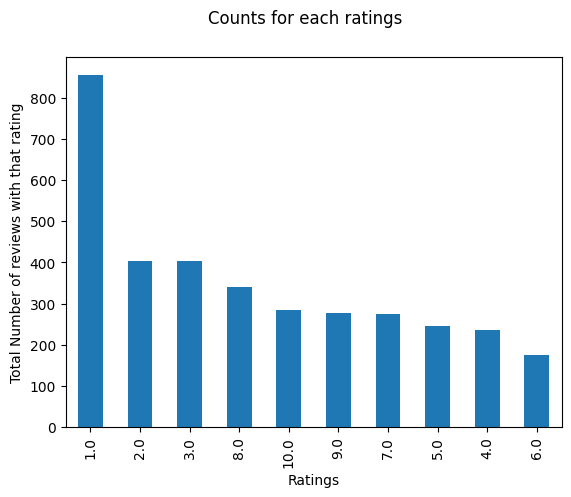

In [57]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
# df_ratings = pd.DataFrame(df.stars.value_counts())
# pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
# pct_values = [round(x,2) for x in pct_values]
# df_ratings['pct_values'] = pct_values

In [58]:

# Calculate ratings counts and reset index
df_ratings = df['stars'].value_counts().reset_index()
df_ratings.columns = ['stars', 'count']  # Rename columns for clarity

# Calculate percentage values
df_ratings['pct_values'] = (df_ratings['count'] / df_ratings['count'].sum() * 100).round(2)

In [59]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()


In [60]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [61]:
df_ratings

,Stars,total_counts,count,pct_values
0,0,1.0,856,24.49
1,1,2.0,404,11.56
2,2,3.0,403,11.53
3,3,8.0,340,9.73
4,4,10.0,284,8.13
5,5,9.0,278,7.95
6,6,7.0,274,7.84
7,7,5.0,246,7.04
8,8,4.0,235,6.72
9,9,6.0,175,5.01


<ipython-input-62-f9c1669a6e38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
<ipython-input-62-f9c1669a6e38>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

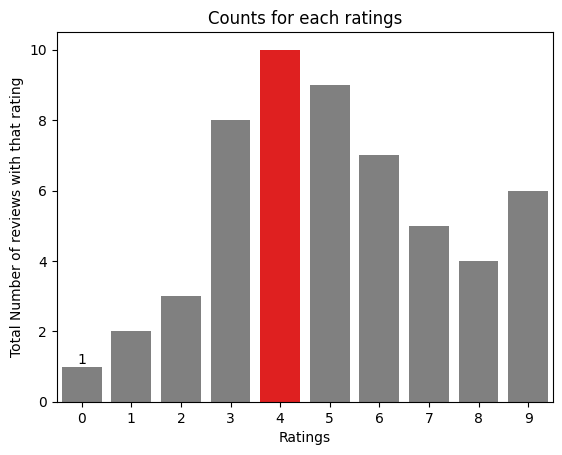

In [62]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [63]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


In [64]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [65]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)


Text(0.5, 1.0, 'Maximum number of review by country')

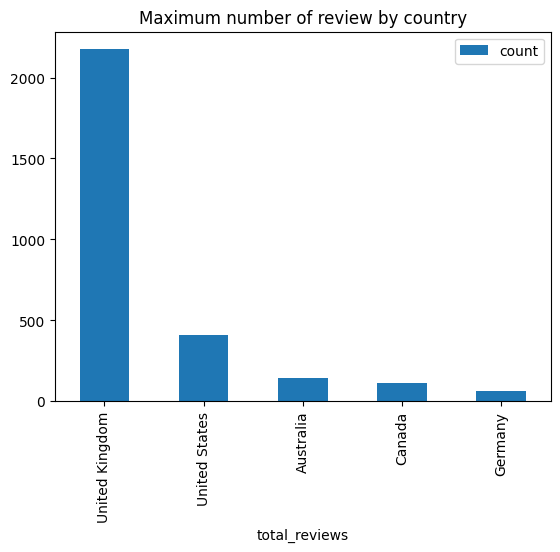

In [66]:
df_country_review.plot(kind="bar", x= 'total_reviews')
plt.title("Maximum number of review by country")

In [67]:

df['stars'] = pd.to_numeric(df['stars'], errors='coerce')  # coerce errors to NaN if conversion fails

# Group by 'country' and calculate the mean of 'stars'
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()

# Rename columns for clarity
df_country_rating.columns = ['country', 'avg_stars']

In [ ]:
# df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [68]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0, 0.5, 'Average Rating')

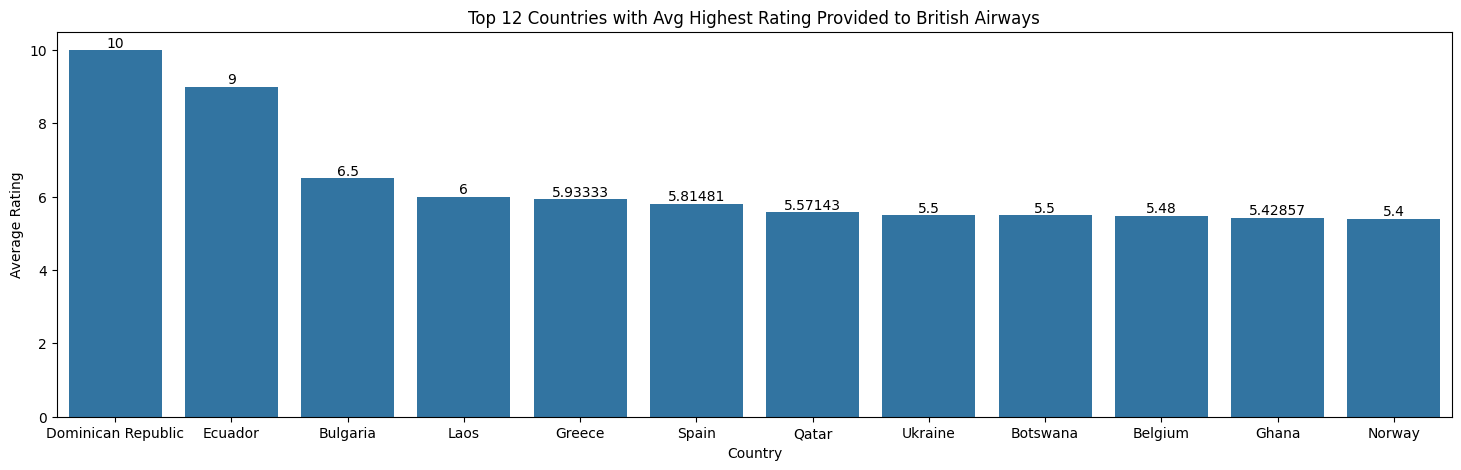

In [69]:
fig, ax = plt.subplots(figsize=(18, 5))
ax1 = sns.barplot(x='country', y='avg_stars', data=df_country_rating[:12], ax=ax)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Top 12 Countries with Avg Highest Rating Provided to British Airways")
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Rating')

In [70]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)


In [71]:
# Create the line chart
fig = px.line(df, x='date', y='stars', title="Average Ratings Over Time")

# Add range slider and labels
fig.update_xaxes(
    title_text="Date",
    rangeslider_visible=True
)

fig.update_yaxes(title_text="Stars")

# Show the plot
fig.show()

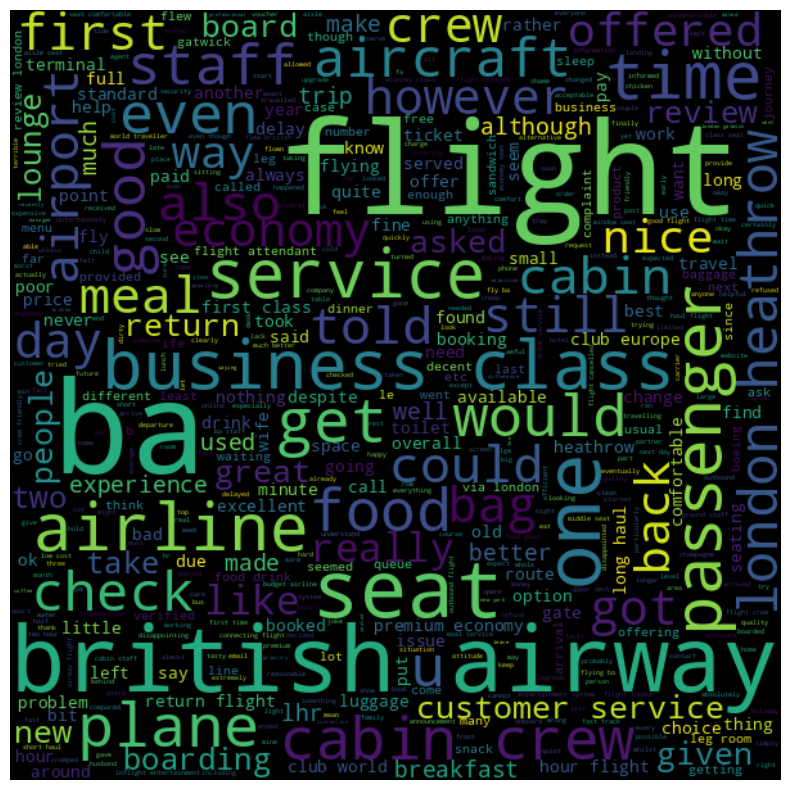

In [72]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

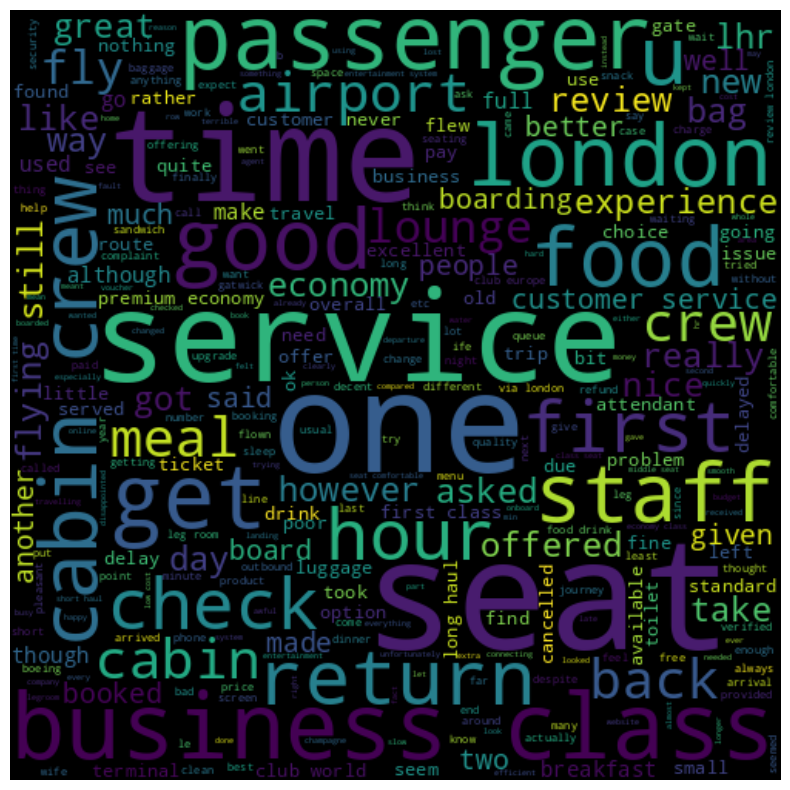

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'boarding')])

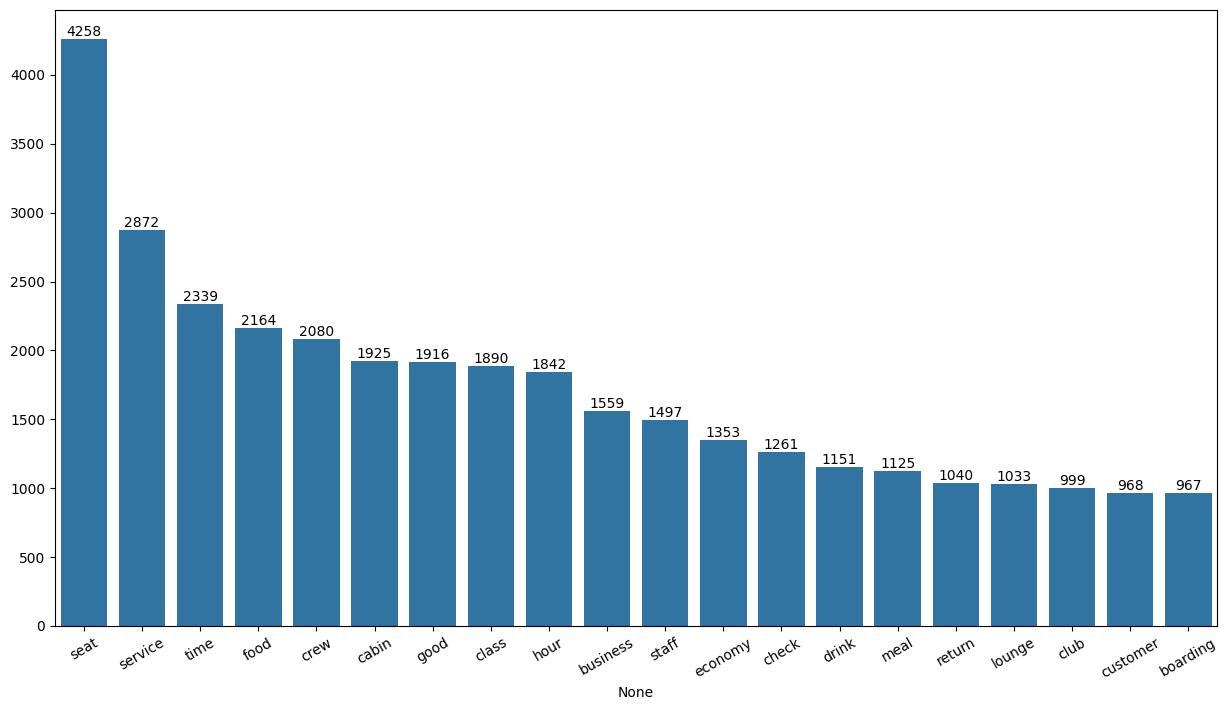

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

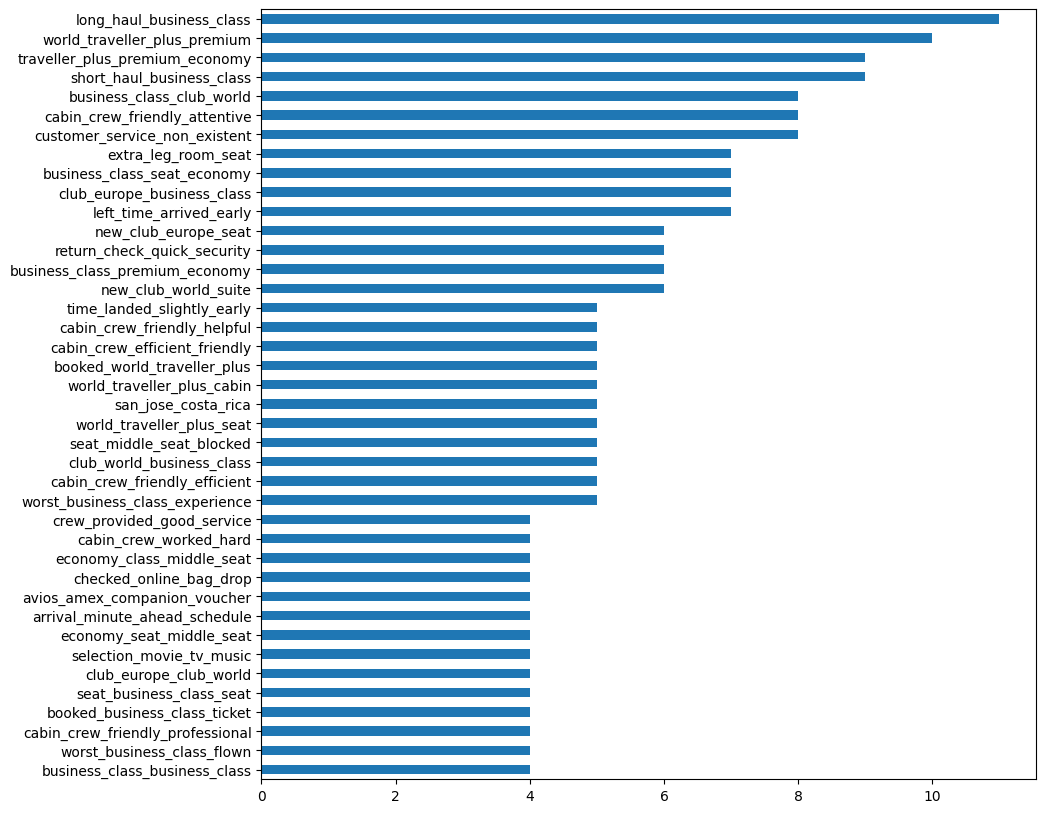

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

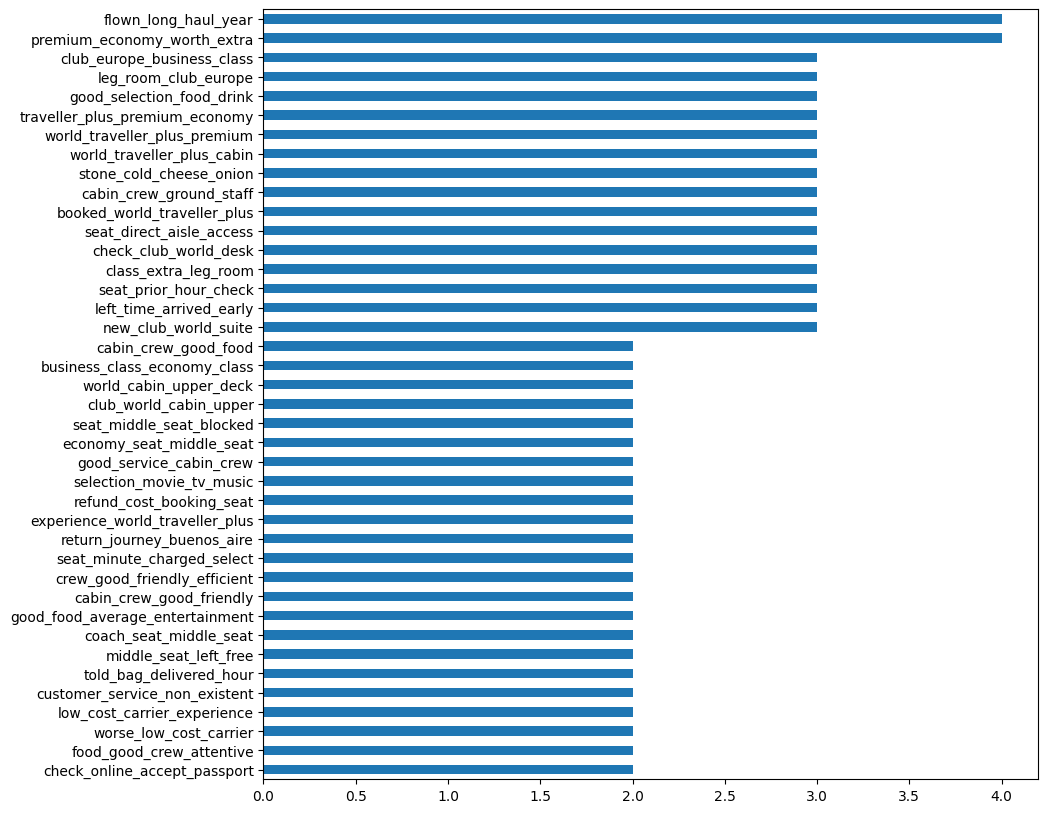

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

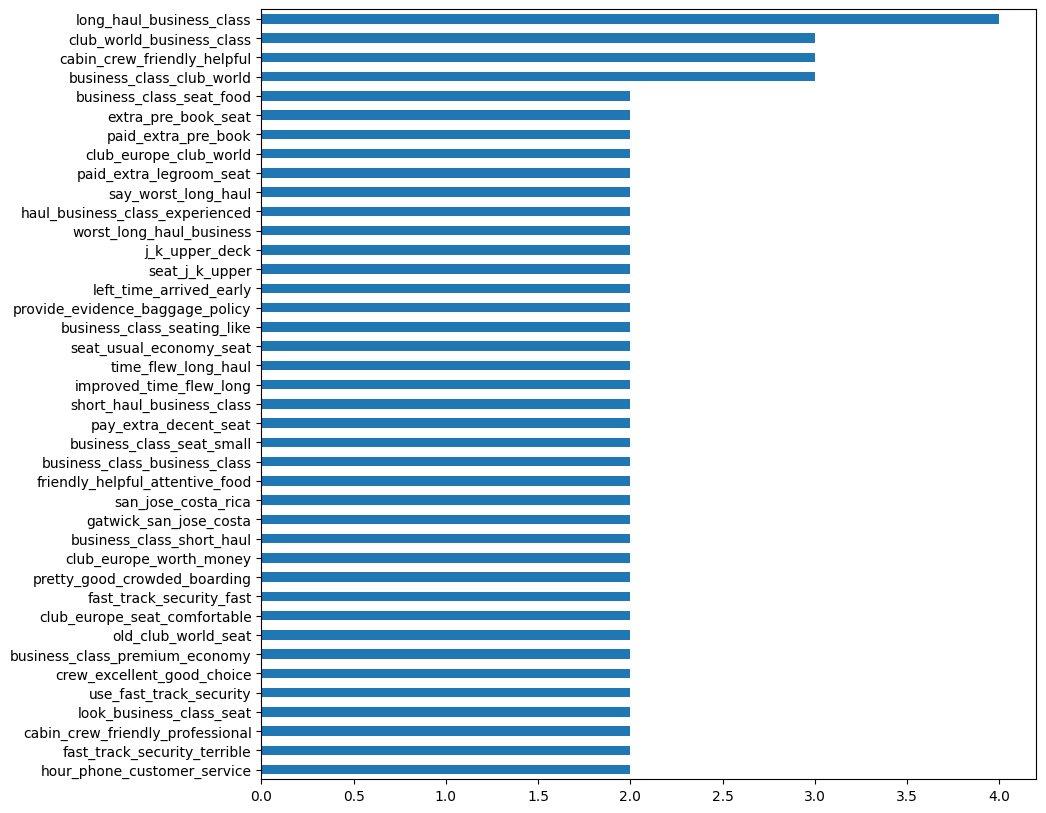

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

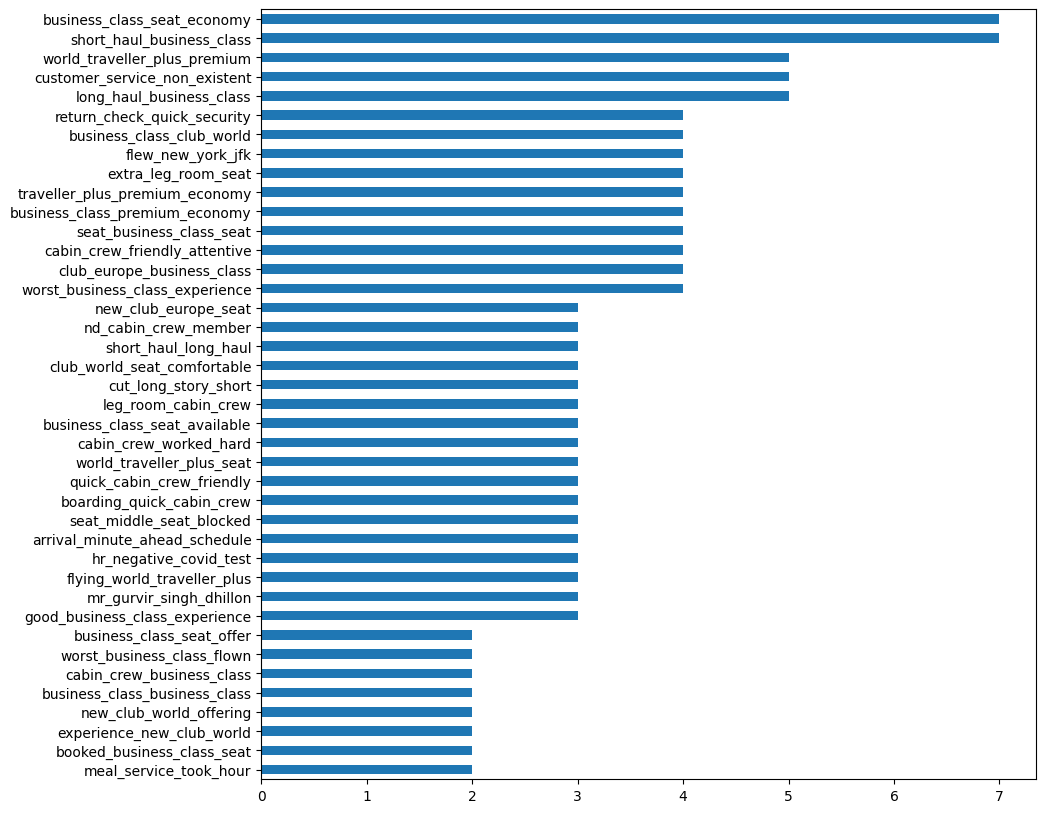

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [ ]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2398 number of reviews between -0.2 and 0.2 polarity score
1396 number of reviews between -0.1 and 0.1 polarity score


In [ ]:
%%capture
import nltk
# Download the vader_lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'
# Download the vader_lexicon
#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.label.value_counts()

label
 1    2195
-1    1183
 0     120
Name: count, dtype: int64

In [ ]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
# Get feature names
tf_feature_names = vect.get_feature_names_out()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,seat,497.6,flight,2337.0,flight,774.7,flight,651.9,first,380.3,ba,499.3,seat,2095.6,flight,2247.3
1,ba,473.3,ba,1157.6,ba,477.1,meal,394.1,ba,329.7,service,308.6,ba,837.1,good,1012.7
2,flight,400.4,hour,861.3,service,300.6,seat,371.4,crew,268.3,british,290.3,flight,803.3,time,893.3
3,check,233.0,airway,642.4,seat,281.1,food,312.9,service,266.7,airway,286.6,class,702.6,crew,823.2
4,business,188.1,british,640.0,london,207.3,airway,258.6,class,265.2,airline,265.8,business,663.1,ba,795.7
5,class,176.6,customer,633.5,heathrow,196.4,british,258.3,food,241.4,staff,225.2,food,577.9,lounge,769.6
6,airline,144.0,london,602.1,cabin,170.5,ba,238.3,flight,233.8,food,215.9,economy,574.2,service,739.8
7,staff,126.3,day,593.3,crew,163.9,cabin,220.0,cabin,211.8,review,189.8,cabin,502.3,seat,669.4
8,luggage,117.8,told,584.5,time,162.3,service,205.3,good,166.5,class,182.1,good,473.5,drink,628.0
9,time,116.8,get,545.2,british,157.1,hour,199.7,club,144.1,flight,177.5,crew,446.9,food,613.9


In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.05327947, 0.0270341 ],
       [0.03591983, 0.04609286],
       [0.03768682, 0.        ],
       ...,
       [0.05519763, 0.03462169],
       [0.0386328 , 0.18741511],
       [0.02810561, 0.08434767]])

In [ ]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,34.0,seat,16.8
1,ba,11.8,ba,9.3
2,hour,7.8,class,7.6
3,time,6.4,business,6.0
4,london,5.8,service,5.9
5,airway,5.6,food,5.9
6,british,5.6,cabin,5.7
7,service,5.4,crew,5.4
8,would,4.8,good,5.3
9,day,4.3,economy,4.5
